In [ ]:
#Downloading the MNIST Dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


5


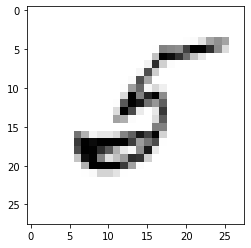

In [ ]:
import matplotlib.pyplot as plt
image_index = 1111 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
input_shape = 28*28
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
model1 = Sequential()
#First Hidden Layer
model1.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

#Compiling the neural network
model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model1.fit(x_train,y_train, batch_size=32, epochs=2)


model1.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1805 - accuracy: 0.9447
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.0777 - accuracy: 0.9762


[0.07767318189144135, 0.9761999845504761]

9


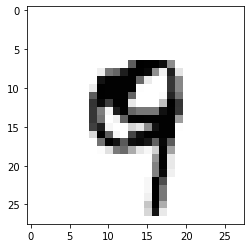

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1, 784, 1))
print(pred.argmax())

In [ ]:
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model2.add(Dense(750, activation='relu'))#Output Layer
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

#Compiling the neural network
model2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model2.fit(x_train,y_train, batch_size=32, epochs=2)


model2.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1933 - accuracy: 0.9418
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.0907 - accuracy: 0.9726


[0.09070122987031937, 0.972599983215332]

In [ ]:
from tensorflow.keras.layers import Dropout
from keras.layers import BatchNormalization
model3 = Sequential()
#First Hidden Layer
model3.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(750, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(10, activation='softmax'))

#Compiling the neural network
model3.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model3.fit(x_train,y_train, batch_size=32, epochs=2)


model3.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2619 - accuracy: 0.9209
Epoch 2/2
313/313 [==============================] - 3s 8ms/step - loss: 0.0865 - accuracy: 0.9732


[0.08651475608348846, 0.9732000231742859]